**라이브러리 Import 하기**

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

**X and Y data (given)**

In [ ]:
x_train = [1, 2, 3, 4, 5, 6, 7]
y_train = [3, 6, 9, 12, 15, 18, 21] #y=3x

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise
# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

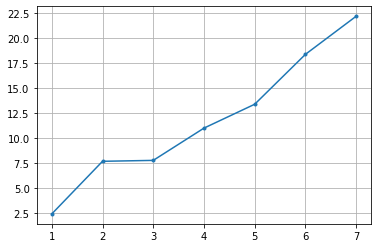

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [ ]:
useRandom = False

In [ ]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 6.0;
    b0 = 3.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

Our hypothesis
$$H(X)=Wx+b$$

In [ ]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**
* loss of one training example:
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$


In [ ]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [ ]:
sess = tf.Session()

**Initializes global variables in the graph.**

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
nb_epoch = 2001
vloss = []
vb =  []
vw = [] 

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    w1 = sess.run(W)[0] # 기울기
    b1 = sess.run(b)[0] # bias
    
    vloss.append(loss1)
    vb.append(b1)
    vw.append(w1)

    if step % 100 == 0: # 100번마다
       
        print(step,'\t', loss1,'\t', w1,'\t',b1)

0 	 92.01742 	 4.555839 	 2.697337
100 	 2.0442498 	 2.7039905 	 1.4099128
200 	 1.6693475 	 2.8245661 	 0.81282955
300 	 1.4958376 	 2.9065945 	 0.4066301
400 	 1.4155339 	 2.9623988 	 0.1302906
500 	 1.3783681 	 3.0003629 	 -0.057704937
600 	 1.3611677 	 3.0261898 	 -0.18559933
700 	 1.3532069 	 3.04376 	 -0.27260664
800 	 1.3495225 	 3.0557134 	 -0.33179832
900 	 1.3478167 	 3.0638452 	 -0.37206635
1000 	 1.3470284 	 3.0693774 	 -0.39946145
1100 	 1.3466626 	 3.073141 	 -0.41809833
1200 	 1.3464931 	 3.0757012 	 -0.430777
1300 	 1.3464152 	 3.0774431 	 -0.43940225
1400 	 1.3463794 	 3.078628 	 -0.44527036
1500 	 1.3463622 	 3.0794342 	 -0.44926196
1600 	 1.3463548 	 3.0799825 	 -0.4519774
1700 	 1.3463515 	 3.0803556 	 -0.4538249
1800 	 1.3463495 	 3.0806096 	 -0.45508197
1900 	 1.3463485 	 3.080782 	 -0.45593712
2000 	 1.3463484 	 3.0808995 	 -0.4565188


Text(0, 0.5, 'loss')

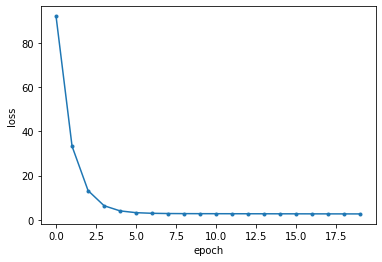

In [ ]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

**TODO**

Text(0, 0.5, 'loss')

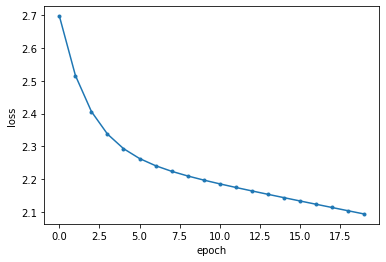

In [ ]:
plt.plot(vb[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

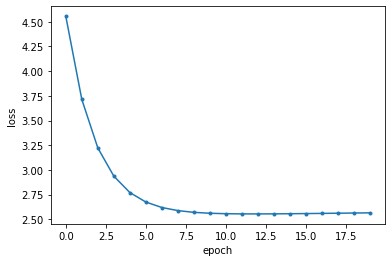

In [ ]:
plt.plot(vw[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

**학습완료**

In [ ]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias


출력해보기

In [ ]:
print(w1, b1)

3.0808995 -0.4565188


In [ ]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 3.0808995x + -0.4565188


Text(0.5, 1.0, 'y = 3.0808995x + -0.4565188')

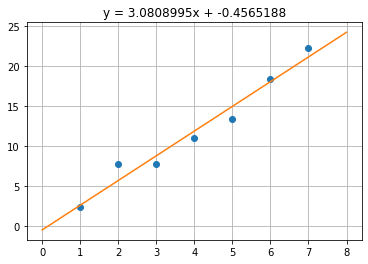

In [ ]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)